## Import Library

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import csv

## Importing the Dataset

In [2]:
energy = []

# read the file 
with open("./raw_data.csv", "r") as csvfile:
    file_reader = csv.reader(csvfile)
    
    for row in file_reader:
        energy.append(row)

# change data into numpy array
energy = np.array(energy)

In [3]:
energy

array([['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'],
       ['CLETPUS', '194913', '135451.32', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['CLETPUS', '195013', '154519.994', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ...,
       ['ELETPUS', '202209', '350919.559', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours'],
       ['ELETPUS', '202210', '314048.288', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours'],
       ['ELETPUS', '202211', '323198.745', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours']], dtype='<U80')

In [4]:
energy.shape

(8737, 6)

## Saving File

In [5]:
np.savetxt("energy.csv", energy, fmt="%s", delimiter=",")

## Describe Data

In [6]:
header = energy[0,:]
data = energy[1:,:]

print("Header:\n",header,"\n\n Data\n",data)

Header:
 ['MSN' 'YYYYMM' 'Value' 'Column_Order' 'Description' 'Unit'] 

 Data
 [['CLETPUS' '194913' '135451.32' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '195013' '154519.994' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '195113' '185203.657' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ...
 ['ELETPUS' '202209' '350919.559' '13'
  'Electricity Net Generation Total (including from sources not shown), All Sectors'
  'Million Kilowatthours']
 ['ELETPUS' '202210' '314048.288' '13'
  'Electricity Net Generation Total (including from sources not shown), All Sectors'
  'Million Kilowatthours']
 ['ELETPUS' '202211' '323198.745' '13'
  'Electricity Net Generation Total (including from sources not shown), All Sectors'
  'Million Kilowatthours']]


## Sources of Energy in US

In [7]:
num_of_source = len(np.unique(data[:,4]))

print("US Generate Electricity from {} sources\n\n".format(num_of_source))
print(np.unique(data[:,4]))

US Generate Electricity from 13 sources


['Electricity Net Generation From Coal, All Sectors'
 'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
 'Electricity Net Generation From Geothermal, All Sectors'
 'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
 'Electricity Net Generation From Natural Gas, All Sectors'
 'Electricity Net Generation From Nuclear Electric Power, All Sectors'
 'Electricity Net Generation From Other Gases, All Sectors'
 'Electricity Net Generation From Petroleum, All Sectors'
 'Electricity Net Generation From Solar, All Sectors'
 'Electricity Net Generation From Waste, All Sectors'
 'Electricity Net Generation From Wind, All Sectors'
 'Electricity Net Generation From Wood, All Sectors'
 'Electricity Net Generation Total (including from sources not shown), All Sectors']


In [8]:
data[0,4] == 'Electricity Net Generation From Coal, All Sectors'

True

## Extract the wind energy data

In [16]:
wind_mask = data[:,4] == "Electricity Net Generation From Wind, All Sectors"
wind_data = data[wind_mask]
np.savetxt("wind.csv", wind_data, fmt="%s", delimiter=",")

array([['WYETPUS', '194913', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '195013', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '195113', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ...,
       ['WYETPUS', '202209', '27024.307', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '202210', '32824.906', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '202211', '41971.407', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

## Lets Explore the Wind Data

In [18]:
wind_data

array([['WYETPUS', '194913', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '195013', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '195113', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ...,
       ['WYETPUS', '202209', '27024.307', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '202210', '32824.906', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '202211', '41971.407', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

## EDA - Exploratory Data Analysis

In [23]:
# Return the shape of my data
print("Row: ",wind_data.shape[0])
print("Column: ",wind_data.shape[1])

Row:  672
Column:  6


## Data Cleaning

In the value column, some data point include "Not Available" Which means </br>
energy were not recorded under wind for that year.

In [27]:
wind_data[:,2]

array(['Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', 'Not Available', 'Not Available', 'Not Available',
       'Not Available', '

In [33]:
available_mask = wind_data[:,2] != "Not Available"

wind_data = wind_data[available_mask]

In [34]:
wind_data

array([['WYETPUS', '198301', '0.172', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198302', '0.018', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198303', '0.313', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ...,
       ['WYETPUS', '202209', '27024.307', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '202210', '32824.906', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '202211', '41971.407', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

## Save Clean Wind Data

In [35]:
np.savetxt("wind.csv", wind_data, fmt="%s", delimiter=",")

## Analysis

In [67]:
annual_mask = np.array([x[-2:] == '13' for x in wind_data[:,1]] )

In [68]:
annual_wind_data = wind_data[annual_mask]

In [69]:
annual_wind_data

array([['WYETPUS', '198313', '2.668', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198413', '6.49', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198513', '5.762', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198613', '4.189', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198713', '3.541', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198813', '0.871', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198913', '2112.043', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '19901

#### 1. Total Energy Generated Per Year

In [70]:
all_energy = annual_wind_data[:,2].astype(float)

In [80]:
print("The total wind energy generated in USA between 1986 - 2021 is: {} killowatt per Hours".format(all_energy.sum()))

The total wind energy generated in USA between 1986 - 2021 is: 2952374.691 killowatt per Hours


#### 2. The Mean Energy Generated

In [73]:
all_energy.mean()

75701.91515384616

#### 3. The Standard Deviation of Energy Generated

In [74]:
all_energy.std()

109069.92321094654

In [81]:
y = annual_wind_data[:,1]  # year
x = annual_wind_data[:,2]  # enegy

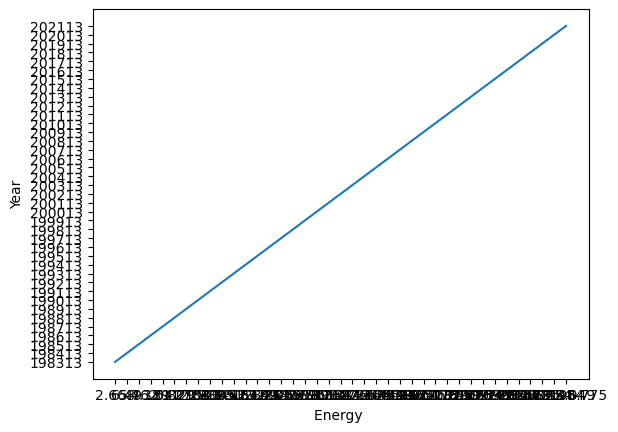

In [83]:
plt.plot(x,y)
plt.xlabel("Energy ")
plt.ylabel("Year")
plt.show()